In [1]:
pip install psycopg2-binary

Note: you may need to restart the kernel to use updated packages.


In [2]:
import psycopg2 # драйвер для postgresql
import getpass  # прячем пароль, чтобы не писать его в параметрах

conn=psycopg2.connect(user='postgres',
                      database='postgres',
                      host='localhost',
                      port='5432',
                      password=getpass.getpass('Insert password: ')
                        )
print(conn.get_dsn_parameters())

Insert password: ········
{'user': 'postgres', 'dbname': 'postgres', 'host': 'localhost', 'port': '5432', 'tty': '', 'options': '', 'sslmode': 'prefer', 'sslcompression': '0', 'krbsrvname': 'postgres', 'target_session_attrs': 'any'}


In [3]:
# Запрос кодов бумаг
import pandas as pd
query_sec="SELECT DISTINCT \"SECCODE\" FROM order_log ORDER BY \"SECCODE\" ASC"
securities=pd.read_sql_query(query_sec,conn)
securities[50:70].head()

,SECCODE
50,FXGD
51,FXIT
52,FXJP
53,FXMM
54,FXRB


In [4]:
# Получение данных из базы
import pandas as pd
query = "SELECT * FROM order_log WHERE \"TIME\" <= 100500000 AND \"SECCODE\" = 'ALRS';"
data = pd.read_sql_query(query,conn)
data.head(10)

,NO,SECCODE,BUYSELL,TIME,ORDERNO,ACTION,PRICE,VOLUME,TRADENO,TRADEPRICE
0,49,ALRS,S,100000000,49,1,54.08,600,NaN,NaN
1,50,ALRS,S,100000000,50,1,53.92,2200,NaN,NaN
2,62,ALRS,B,100000000,62,1,52.33,400,NaN,NaN
3,71,ALRS,B,100000000,71,1,52.53,100,NaN,NaN
4,348,ALRS,S,100000000,348,1,55.09,200,NaN,NaN
5,350,ALRS,S,100000000,350,1,55.42,300,NaN,NaN
6,781,ALRS,S,100000000,781,1,53.94,2500,NaN,NaN
7,1077,ALRS,S,100000000,1077,1,54.74,2500,NaN,NaN
8,1204,ALRS,S,100000000,1204,1,54.99,100,NaN,NaN
9,1210,ALRS,S,100000000,1210,1,54.98,100,NaN,NaN


In [5]:
#Сортировка по цене в убывающем порядке
data.sort_values(by=['PRICE'], ascending = False)

,NO,SECCODE,BUYSELL,TIME,ORDERNO,ACTION,PRICE,VOLUME,TRADENO,TRADEPRICE
921,139295,ALRS,S,100157834,75176,1,59.80,5300,NaN,NaN
224,12191,ALRS,S,100002070,11130,1,58.70,100,NaN,NaN
11,1261,ALRS,S,100000000,1261,1,58.00,1000,NaN,NaN
126,6851,ALRS,S,100000000,6851,1,58.00,2500,NaN,NaN
48,3197,ALRS,S,100000000,3197,1,57.48,1000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1567,339855,ALRS,S,100433666,174170,2,0.00,100,2.541198e+09,53.58
1607,351469,ALRS,S,100442480,179952,2,0.00,200,2.541198e+09,53.52
1609,351471,ALRS,S,100442480,179952,2,0.00,500,2.541198e+09,53.51
1629,353258,ALRS,S,100443535,180847,1,0.00,100,NaN,NaN


In [6]:
data.pivot_table(index = 'PRICE', columns = 'BUYSELL', values = 'VOLUME', aggfunc = 'sum').sort_values(by=['PRICE'], ascending = False)

BUYSELL,B,S
PRICE,,
59.80,NaN,5300.0
58.70,NaN,100.0
58.00,NaN,3500.0
57.48,NaN,1000.0
57.35,NaN,100.0
...,...,...
48.61,4100.0,NaN
48.30,5000.0,NaN
48.25,4600.0,NaN


In [21]:
#Поиск значений, где цена =0 (рыночные заявки)
data[data['PRICE']==0.0]

,NO,SECCODE,BUYSELL,TIME,ORDERNO,ACTION,PRICE,VOLUME,TRADENO,TRADEPRICE
952,161283,ALRS,B,100215099,85840,1,0.0,500,NaN,NaN
953,161284,ALRS,B,100215099,85840,2,0.0,500,2.541194e+09,53.74
1536,339853,ALRS,S,100433666,174170,1,0.0,200,NaN,NaN
1567,339855,ALRS,S,100433666,174170,2,0.0,100,2.541198e+09,53.58
1569,339857,ALRS,S,100433666,174170,2,0.0,100,2.541198e+09,53.58
1570,341994,ALRS,S,100435201,175227,1,0.0,200,NaN,NaN
1573,351473,ALRS,S,100442480,179952,2,0.0,1400,2.541198e+09,53.51
1575,341996,ALRS,S,100435201,175227,2,0.0,200,2.541198e+09,53.58
1589,351451,ALRS,S,100442480,179952,1,0.0,6000,NaN,NaN
1591,351453,ALRS,S,100442480,179952,2,0.0,100,2.541198e+09,53.56


In [22]:
# Построение книги лимитированных заявок (LOB - Limit Order Book)

# Устанавливаем маску лимитных заявок заявках (цена не равна 0)
no_mrk_ind=data['PRICE']!=0
#  Таблица выставленных заявок при условии, что цена не равна 0
plc=data[['ORDERNO','BUYSELL','PRICE','VOLUME']][(data['ACTION']==1) & no_mrk_ind]
# Таблица отозванных заявок при условии, что цена не равна 0
wdr=data[['ORDERNO','VOLUME']][(data['ACTION']==0) & no_mrk_ind]
# Таблица исполненных объемов
trds=data[['ORDERNO','VOLUME']][(data['ACTION']==2) & no_mrk_ind] 
trds=trds[['ORDERNO','VOLUME']].groupby(['ORDERNO']).sum()
trds['ORDERNO']=trds.index
trds.index=range(trds.shape[0])

# Книга (aka стакан, aka LOB)
lob=pd.merge(plc,wdr, on='ORDERNO',how='left',suffixes=('_plc','_wdr'))
lob=pd.merge(lob,trds, on='ORDERNO', how='left')
lob=lob.rename(columns={'VOLUME':'VOLUME_trds'})
lob=lob.fillna(0)
lob['TOTAL_VOL']=lob['VOLUME_plc']-lob['VOLUME_wdr']-lob['VOLUME_trds']
lob=lob[lob['TOTAL_VOL']>0]
lob 

,ORDERNO,BUYSELL,PRICE,VOLUME_plc,VOLUME_wdr,VOLUME_trds,TOTAL_VOL
0,49,S,54.08,600,0.0,0.0,600.0
2,62,B,52.33,400,0.0,0.0,400.0
4,348,S,55.09,200,0.0,0.0,200.0
5,350,S,55.42,300,0.0,0.0,300.0
6,781,S,53.94,2500,0.0,0.0,2500.0
...,...,...,...,...,...,...,...
973,187915,S,56.05,700,0.0,0.0,700.0
974,187918,S,56.20,700,0.0,0.0,700.0
975,187919,S,56.35,700,0.0,0.0,700.0
976,188155,B,53.25,5000,0.0,0.0,5000.0


In [23]:
#Поиск 90-персентиля 
import numpy as np

tr = lob['TOTAL_VOL']
per_tr_90 = np.percentile(tr, 90)
print('90%-percentile:', per_tr_90)

90%-percentile: 3650.0000000000055


In [24]:
#Cтакан заявок
lob=lob.pivot_table(index='PRICE',columns='BUYSELL',values='TOTAL_VOL',aggfunc='sum')
lob.sort_index(axis=0,inplace=True, ascending=False)
lob=lob.fillna(0)
lob.head(100)

BUYSELL,B,S
PRICE,,
59.80,0.0,5300.0
58.70,0.0,100.0
58.00,0.0,3500.0
57.48,0.0,1000.0
57.35,0.0,100.0
...,...,...
53.86,0.0,3300.0
53.83,0.0,2300.0
53.80,0.0,5300.0


In [11]:
import pandas as pd
with pd.ExcelWriter(r'C:\Users\User\Desktop\стакан.xlsx') as writer:
    lob.to_excel(writer)

In [12]:
import numpy as np
bid = lob[lob['B']>0].index[0:5]
ask = lob[lob['S']>0].index[-6:]
ask.append(bid)
best_lob=lob.loc[ask.append(bid)]
best_lob1 = pd.DataFrame(best_lob).reset_index().rename_axis(None, axis=1)
best_lob1

,PRICE,B,S
0,53.64,0.0,200.0
1,53.63,0.0,2300.0
2,53.60,0.0,200.0
3,53.59,0.0,2300.0
4,53.58,0.0,5300.0
5,53.57,0.0,2200.0
6,53.53,700.0,0.0
7,53.52,200.0,0.0
8,53.51,600.0,0.0
9,53.50,7300.0,0.0


In [13]:
#Расчет, как сдвинется цена Sell, если исполнится объем равный 3650 (Price impact on the Sell side)
import pandas as pd

df2 = best_lob1.copy()
print(df2)
df = df2.loc[df2.S != 0.0, :][::-1]
print(df)

res = 0
s = []
#Если сумма накопленных объемов больше 3650, то от 3650 отнимаем сумму предыдущих объемов, находим дельту и умножаем ее на цену последней заявки
for i in df.index:
	if res > 3000:
		delta = 3000 - (res - df.loc[i+1, 'S'])
		print(delta)
		p = (sum(s[:-1]) + df.loc[i+1, 'PRICE']*delta)/3000
		break
#Если сумма накопленных объемов равна 3650, то цены умножаем на объемы и делим на исполненный объем
	elif res == 3000:
		p = (sum(s[:-1]) + df.loc[i+1, 'PRICE']*df.loc[i+1, 'S'])/3000
		break
	else:
		res += df.loc[i, 'S']
		s.append(df.loc[i, 'S'] * df.loc[i, 'PRICE'])
ask_impact = p
print('Price impact:',ask_impact)

    PRICE       B       S
0   53.64     0.0   200.0
1   53.63     0.0  2300.0
2   53.60     0.0   200.0
3   53.59     0.0  2300.0
4   53.58     0.0  5300.0
5   53.57     0.0  2200.0
6   53.53   700.0     0.0
7   53.52   200.0     0.0
8   53.51   600.0     0.0
9   53.50  7300.0     0.0
10  53.49  2300.0     0.0
   PRICE    B       S
5  53.57  0.0  2200.0
4  53.58  0.0  5300.0
3  53.59  0.0  2300.0
2  53.60  0.0   200.0
1  53.63  0.0  2300.0
0  53.64  0.0   200.0
800.0
Price impact: 53.57266666666667


In [14]:
#Расчет, как сдвинется цена Buy, если исполнится объем равный 3650 (Price impact on the Buy side)
import pandas as pd

df2 = best_lob1.copy()
print(df2)
df = df2.loc[df2.B != 0.0, :][::-1]
print(df)

res = 0
s = []

for i in df.index:
	if res > 3000:
		delta = 3000 - (res - df.loc[i+1, 'B'])
		print(delta)
		p = (sum(s[:-1]) + df.loc[i+1, 'PRICE']*delta)/3000
		print(p)        
		break
	elif res == 3000:
		p = (sum(s[:-1]) + df.loc[i+1, 'PRICE']*df.loc[i+1, 'B'])/3000
		break
	else:
		res += df.loc[i, 'B']
		s.append(df.loc[i, 'B'] * df.loc[i, 'PRICE'])
bid_impact = p
print('Price impact:',bid_impact)

    PRICE       B       S
0   53.64     0.0   200.0
1   53.63     0.0  2300.0
2   53.60     0.0   200.0
3   53.59     0.0  2300.0
4   53.58     0.0  5300.0
5   53.57     0.0  2200.0
6   53.53   700.0     0.0
7   53.52   200.0     0.0
8   53.51   600.0     0.0
9   53.50  7300.0     0.0
10  53.49  2300.0     0.0
    PRICE       B    S
10  53.49  2300.0  0.0
9   53.50  7300.0  0.0
8   53.51   600.0  0.0
7   53.52   200.0  0.0
6   53.53   700.0  0.0
700.0
53.492333333333335
Price impact: 53.492333333333335


In [15]:
import pandas as pd
with pd.ExcelWriter(r'C:\Users\User\Desktop\стакан.xlsx') as writer:
    best_lob.to_excel(writer)

In [16]:
best_lob=lob.loc[ask.append(bid)]
best_bid=max(lob[lob['B']>0].index)
best_ask=min(lob[lob['S']>0].index)
print(best_ask, best_bid)

53.57 53.53


In [17]:
#Бид и аск котируемый объем вне зависимости от цены
import numpy as np
ask_quoted_volume = best_lob['S'].sum()
bid_quoted_volume = best_lob['B'].sum()
av_quoted_volume = (ask_quoted_volume+bid_quoted_volume)/2
print(ask_quoted_volume,bid_quoted_volume,av_quoted_volume)

12500.0 11100.0 11800.0


Bid-ask spread: -0.03999999999999915


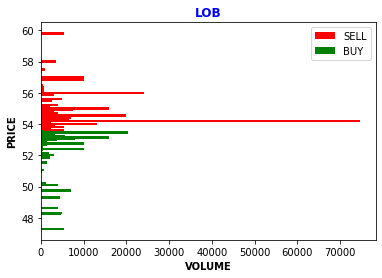

In [18]:
#Визуализация стакана лимитированных заявок до заданного момента времени
import matplotlib.pyplot as plt

font = {'family': 'sans-serif',
        'color':  'blue',
        'weight': 'bold',
        'size': 12,
        }

fig, ax = plt.subplots()
plt.title('LOB',loc='center',fontdict =font)
x = lob.index
y1 = lob['S']
y2 = lob['B']
plt.barh(x,y1,height = 0.15, label = 'SELL', color = 'r')
plt.barh(x,y2,height = 0.15, label = 'BUY', color = 'g')
plt.xlabel('VOLUME',weight= 'bold',size = 10)
plt.ylabel('PRICE',weight= 'bold',size = 10)
best_bid = max(lob[lob['B']>0].index)
best_ask = min(lob[lob['S']>0].index)
bid_ask_spread=best_bid-best_ask
print('Bid-ask spread:', bid_ask_spread)
plt.legend()
plt.show()

In [30]:
import pandas as pd
import numpy as np

def calc(sec, time_s, time_e, step, typE, conn):
    
    # time_s = левая часть интервала времени (HHMMSSZZZ)
    # time_e = правая часть интервала (HHMMSSZZZ)
    # step = длительность шага (т.е. для пятиминутного шага step = 5)
    # typE = единица измерения шага ('h', 'm', 's' или любое другое обозначение для миллисекунд)
    # sec = код бумаги в формате '\'CODE\''
    # conn = connection
    
    query="SELECT * FROM order_log WHERE \"TIME\"<="+str(time_e)+" AND \"SECCODE\"="+sec
    orders=pd.read_sql_query(query,conn)
        
    # Переводим начальное время в миллисекунды
    dts = str(time_s)
    h,m,s,z = int(dts[:2]),int(dts[2:4]),int(dts[4:6]),int(dts[6:])
    tsm = h * 3600000 + m * 60000 + s * 1000 + z
    
    # Переводим конечное время в миллисекунды
    dte = str(time_e)
    h,m,s,z = int(dte[:2]),int(dte[2:4]),int(dte[4:6]),int(dte[6:])
    tem = h * 3600000 + m * 60000 + s * 1000 + z
    
    # Переводим шаг в миллисекунды
    if typE == 'h':
        step = step * 3600000
    elif typE == 'm':
        step = step * 60000
    elif typE == 's':
        step = step * 1000

    times = []
    
    while tsm < tem:
        
        # Разбиваем время на отдельные часы, минуты, секунды и миллисекунды
        ha = tsm // 3600000
        ma = (tsm % 3600000) // 60000
        sa = (tsm % 60000) // 1000
        za = tsm % 1000
        
        # Переводим текущее время в "привычный формат"; добавляем его в список
        tmp = ha * 10000000 + ma * 100000 + sa * 1000 + za
        times.append(tmp)
        
        tsm = tsm + step;
    
    # Добавляем конечное время в список
    times.append(time_e)
    # Создаем пустой датафрейм
    
    results = pd.DataFrame(columns=['SECCODE','TIME','ASK_IMPACT','BID_IMPACT','MID_PRICE','BA_SPREAD','BEST_B_VOL','BEST_S_VOL','M_imbalance','Bid_quoted_volume','Ask_quoted_volume','Quoted_spread','Av_quoted_volume','Best_bid','Best_ask','Total_volume'])
    
    # Далее идет функция расчета показателей
    MID_PRICE = []
    BID_IMPACT = []
    ASK_IMPACT = []
    BA_SPREAD = []
    BEST_B_VOL = []
    BEST_S_VOL = []
    M_imbalance = []
    Bid_quoted_volume = []
    Ask_quoted_volume = []
    Quoted_spread = []
    Av_quoted_volume= []
    Best_bid = []
    Best_ask = []
    Total_volume = []
             
    for i in times:
        
        orders_i = orders[orders['TIME']<=i]
        
    # Устанавливаем маску лимитных заявок
        no_mrk_ind=orders_i['PRICE']!=0

    # Таблица выставленных заявок
        plc=orders_i[['ORDERNO','BUYSELL','PRICE','VOLUME']][(orders_i['ACTION']==1) & no_mrk_ind]

    # Таблица отозванных заявок
        wdr=orders_i[['ORDERNO','VOLUME']][(orders_i['ACTION']==0) & no_mrk_ind]
    
    # Таблица исполненных объемов
        trds=orders_i[['ORDERNO','VOLUME']][(orders_i['ACTION']==2) & no_mrk_ind] 
        trds=trds[['ORDERNO','VOLUME']].groupby(['ORDERNO']).sum()
        trds['ORDERNO']=trds.index
        trds.index=range(trds.shape[0])

    # Книга (aka стакан, aka LOB)
        lob=pd.merge(plc,wdr, on='ORDERNO',how='left',suffixes=('_plc','_wdr'))
        lob=pd.merge(lob,trds, on='ORDERNO', how='left')
        lob=lob.rename(columns={'VOLUME':'VOLUME_trds'})
        lob=lob.fillna(0)
        lob['TOTAL_VOL']=lob['VOLUME_plc']-lob['VOLUME_wdr']-lob['VOLUME_trds']
        lob=lob[lob['TOTAL_VOL']>0]
        
        #Поиск общего объема на каждом из интервалов
        total_volume = (lob['TOTAL_VOL']).sum()
        Total_volume.append(total_volume)
        
        #Построение стакана       
        lob=lob.pivot_table(index='PRICE',columns='BUYSELL',values='TOTAL_VOL',aggfunc='sum')
        lob.sort_index(axis=0,inplace=True, ascending=False)
        lob=lob.fillna(0)
        
        bid = lob[lob['B']>0].index[0:5]
        ask = lob[lob['S']>0].index[-6:]
        ask.append(bid)
        best_lob=lob.loc[ask.append(bid)]
        
        best_lob = pd.DataFrame(best_lob).reset_index().rename_axis(None, axis=1)
        
        #Расчет, как сдвинется цена Sell, если исполнится объем 3650(Price impact on the Sell side)
        df2 = best_lob.copy()
        df = df2.loc[df2.S != 0.0, :][::-1]
          
        
        res = 0
        s = []
        for i in df.index:
            if res > 3650:
                delta = 3650 - (res - df.loc[i+1, 'S'])
                p = (sum(s[:-1]) + df.loc[i+1, 'PRICE']*delta)/3650
                break
            elif res == 3650:
                p = (sum(s[:-1]) + df.loc[i+1, 'PRICE']*df.loc[i+1, 'S'])/3650
                break
            else:
                res += df.loc[i, 'S']
                s.append(df.loc[i, 'S'] * df.loc[i, 'PRICE'])
        print('ask_impact',p)
        
        ASK_IMPACT.append(p) 
        
        #Расчет, как сдвинется цена Bid,если исполнится объем 3650
        df3 = best_lob.copy()
        df = df3.loc[df3.B != 0.0, :][::-1]
          
        
        res = 0
        s = []
        for i in df.index:
            if res > 3650:
                delta = 3650 - (res - df.loc[i+1, 'B'])
                p = (sum(s[:-1]) + df.loc[i+1, 'PRICE']*delta)/3650
                break
            elif res == 3650:
                p = (sum(s[:-1]) + df.loc[i+1, 'PRICE']*df.loc[i+1, 'B'])/3650
                break
            else:
                res += df.loc[i, 'B']
                s.append(df.loc[i, 'B'] * df.loc[i, 'PRICE'])
        print('bid_impact',p)
        
        BID_IMPACT.append(p)
        
        #Нахождение лучшей цены bid и ask
    
        best_bid=max(lob[lob['B']>0].index)
        best_ask=min(lob[lob['S']>0].index)
        Best_bid.append(best_bid)
        Best_ask.append(best_ask)
        
        #Расчет показателей ценовой динамики и ликвидности, вычисляемые на основе книги лимитированных заявок
         
        mid_price=(best_bid+best_ask)/2
        MID_PRICE.append(mid_price)
        
        #Переведем в базисные пункты для расчетов PCA bid_ask spread

        bid_ask_spread=(best_ask-best_bid)
        BA_SPREAD.append(bid_ask_spread)
        
        best_B_vol = lob['B'].loc[best_bid]
        BEST_B_VOL.append(best_B_vol)
        
        best_S_vol = lob['S'].loc[best_ask]
        BEST_S_VOL.append(best_S_vol)
        
        market_imbalance = (best_B_vol-best_S_vol)/ (best_B_vol+best_S_vol)
        M_imbalance.append(market_imbalance)
        
        bid_quoted_volume = (lob['B']).sum()
        Bid_quoted_volume.append(bid_quoted_volume)   
        
        ask_quoted_volume = (lob['S']).sum()
        Ask_quoted_volume.append(ask_quoted_volume)
        
        quoted_spread = ((best_ask-best_bid)/mid_price)*100
        Quoted_spread.append(quoted_spread)
        
        av_quoted_volume =(bid_quoted_volume+ask_quoted_volume)/2
        Av_quoted_volume.append(av_quoted_volume)
        
                                     
    results = pd.DataFrame({'SECCODE':sec, 'TIME': times,'ASK_IMPACT':ASK_IMPACT,'BID_IMPACT':BID_IMPACT,'MID_PRICE': MID_PRICE,'BA_SPREAD':BA_SPREAD,'BEST_B_VOL':BEST_B_VOL,'BEST_S_VOL':BEST_S_VOL, 'M_imbalance':M_imbalance,'Bid_quoted_volume':Bid_quoted_volume, 'Ask_quoted_volume':Ask_quoted_volume, 'Quoted_spread':Quoted_spread,'Av_quoted_volume':Av_quoted_volume,'Best_bid':best_bid,'Best_ask':best_ask,'Total_volume':Total_volume})    
    results['MID_PRICE'] = MID_PRICE
    results['ASK_IMPACT']=ASK_IMPACT
    results['BID_IMPACT']=BID_IMPACT
    results['BA_SPREAD'] = BA_SPREAD
    results['BEST_B_VOL'] = BEST_B_VOL
    results['BEST_S_VOL'] = BEST_S_VOL
    results['M_imbalance'] = M_imbalance
    results['TIME']= times
    results['Bid_quoted_volume']= Bid_quoted_volume
    results['Ask_quoted_volume']=Ask_quoted_volume
    results['Quoted_spread']=Quoted_spread
    results['Av_quoted_volume']=Av_quoted_volume
    results['Best_bid']=Best_bid
    results['Best_ask']=Best_ask
    results['Total_volume']=Total_volume
    
    
    return results   

In [133]:
#Расчет метрик ликвидности за торговый день(Торговый период с 10:00:00 до 18:39:59, с 18:40:01 до 18:50:00 - аукцион
#закрытия. Дневная клиринговая сессия с 14:00 до 14:05. Таким образом, выбираем период до 18:40.
x=calc('\'ALRS\'', 100000000, 184000000, 1, 'm', conn)
x.tail(50)

ask_impact 53.92794520547945
bid_impact 53.92794520547945
ask_impact 53.751780821917805
bid_impact 53.55
ask_impact 53.75767123287671
bid_impact 53.57821917808219
ask_impact 53.81082191780822
bid_impact 53.616164383561646
ask_impact 53.69260273972603
bid_impact 53.55123287671233
ask_impact 53.57397260273972
bid_impact 53.49369863013698
ask_impact 53.49369863013698
bid_impact 53.49369863013698
ask_impact 53.32
bid_impact 53.24780821917808
ask_impact 53.46520547945205
bid_impact 53.39506849315069
ask_impact 53.3
bid_impact 53.245616438356166
ask_impact 53.3
bid_impact 53.22109589041096
ask_impact 53.303561643835614
bid_impact 53.203972602739725
ask_impact 53.288356164383565
bid_impact 53.17917808219178
ask_impact 53.28
bid_impact 53.187397260273976
ask_impact 53.36041095890411
bid_impact 53.23616438356164
ask_impact 53.4
bid_impact 53.31904109589041
ask_impact 53.4
bid_impact 53.32369863013699
ask_impact 53.4
bid_impact 53.33
ask_impact 53.4
bid_impact 53.33
ask_impact 53.4
bid_impact 53

,SECCODE,TIME,ASK_IMPACT,BID_IMPACT,MID_PRICE,BA_SPREAD,BEST_B_VOL,BEST_S_VOL,M_imbalance,Bid_quoted_volume,Ask_quoted_volume,Quoted_spread,Av_quoted_volume,Best_bid,Best_ask,Total_volume
471,'ALRS',175100000,54.990000,54.934521,54.985,0.01,4600.0,21300.0,-0.644788,420300.0,442800.0,0.018187,431550.0,54.98,54.99,863100.0
472,'ALRS',175200000,54.991507,54.906164,54.985,0.01,7900.0,3100.0,0.436364,380300.0,425600.0,0.018187,402950.0,54.98,54.99,805900.0
473,'ALRS',175300000,55.147534,55.090274,55.130,0.02,2300.0,900.0,0.437500,398200.0,227900.0,0.036278,313050.0,55.12,55.14,626100.0
474,'ALRS',175400000,55.133973,55.044521,55.115,0.03,1300.0,2200.0,-0.257143,362800.0,250200.0,0.054432,306500.0,55.10,55.13,613000.0
475,'ALRS',175500000,55.056986,54.942329,55.015,0.05,1100.0,2000.0,-0.290323,346300.0,263500.0,0.090884,304900.0,54.99,55.04,609800.0
476,'ALRS',175600000,55.081233,54.997260,55.065,0.03,2800.0,3200.0,-0.066667,379400.0,270300.0,0.054481,324850.0,55.05,55.08,649700.0
477,'ALRS',175700000,54.995753,54.900685,54.970,0.02,700.0,1500.0,-0.363636,326100.0,275100.0,0.036383,300600.0,54.96,54.98,601200.0
478,'ALRS',175800000,55.157260,55.044247,55.115,0.07,200.0,1000.0,-0.666667,416800.0,236800.0,0.127007,326800.0,55.08,55.15,653600.0
479,'ALRS',175900000,55.093699,55.000000,55.075,0.03,100.0,2300.0,-0.916667,407700.0,240800.0,0.054471,324250.0,55.06,55.09,648500.0
480,'ALRS',180000000,55.091781,54.987397,55.065,0.05,1500.0,3000.0,-0.333333,374800.0,227600.0,0.090802,301200.0,55.04,55.09,602400.0


In [134]:
#Поиск среднего значения ask_impact и bid_impact
x['AV_PRICE_IMPACT'] = x[['ASK_IMPACT', 'BID_IMPACT']].mean(axis=1)
x

,SECCODE,TIME,ASK_IMPACT,BID_IMPACT,MID_PRICE,BA_SPREAD,BEST_B_VOL,BEST_S_VOL,M_imbalance,Bid_quoted_volume,Ask_quoted_volume,Quoted_spread,Av_quoted_volume,Best_bid,Best_ask,Total_volume,AV_PRICE_IMPACT
0,'ALRS',100000000,53.927945,53.927945,53.895,0.05,100.0,2200.0,-0.913043,69800.0,229100.0,0.092773,149450.0,53.87,53.92,298900.0,53.927945
1,'ALRS',100100000,53.751781,53.550000,53.655,0.11,100.0,600.0,-0.714286,151200.0,298700.0,0.205014,224950.0,53.60,53.71,449900.0,53.650890
2,'ALRS',100200000,53.757671,53.578219,53.680,0.12,1000.0,1500.0,-0.200000,170400.0,330000.0,0.223547,250200.0,53.62,53.74,500400.0,53.667945
3,'ALRS',100300000,53.810822,53.616164,53.735,0.13,600.0,2300.0,-0.586207,195300.0,331100.0,0.241928,263200.0,53.67,53.80,526400.0,53.713493
4,'ALRS',100400000,53.692603,53.551233,53.650,0.06,400.0,200.0,0.333333,186800.0,360000.0,0.111836,273400.0,53.62,53.68,546800.0,53.621918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,'ALRS',183600000,54.794247,54.660000,54.750,0.08,2400.0,2600.0,-0.040000,161800.0,86100.0,0.146119,123950.0,54.71,54.79,247900.0,54.727123
517,'ALRS',183700000,54.753699,54.697260,54.740,0.02,2000.0,2300.0,-0.069767,162600.0,94800.0,0.036536,128700.0,54.73,54.75,257400.0,54.725479
518,'ALRS',183800000,54.780000,54.713151,54.765,0.03,1500.0,3800.0,-0.433962,157000.0,99100.0,0.054780,128050.0,54.75,54.78,256100.0,54.746575
519,'ALRS',183900000,54.712329,54.635890,54.705,0.01,2900.0,2800.0,0.017544,597500.0,98500.0,0.018280,348000.0,54.70,54.71,696000.0,54.674110


In [135]:
#Расчет Impact cost: https://tavaga.com/tavagapedia/impact-cost/ в базисных пунктах и добавление колонки в дейтафрейм
import numpy as np
x['IMPACT_COST'] = (x['BID_IMPACT'] - x['MID_PRICE'])/(x['MID_PRICE'])*10000
x

,SECCODE,TIME,ASK_IMPACT,BID_IMPACT,MID_PRICE,BA_SPREAD,BEST_B_VOL,BEST_S_VOL,M_imbalance,Bid_quoted_volume,Ask_quoted_volume,Quoted_spread,Av_quoted_volume,Best_bid,Best_ask,Total_volume,AV_PRICE_IMPACT,IMPACT_COST
0,'ALRS',100000000,53.927945,53.927945,53.895,0.05,100.0,2200.0,-0.913043,69800.0,229100.0,0.092773,149450.0,53.87,53.92,298900.0,53.927945,6.112850
1,'ALRS',100100000,53.751781,53.550000,53.655,0.11,100.0,600.0,-0.714286,151200.0,298700.0,0.205014,224950.0,53.60,53.71,449900.0,53.650890,-19.569472
2,'ALRS',100200000,53.757671,53.578219,53.680,0.12,1000.0,1500.0,-0.200000,170400.0,330000.0,0.223547,250200.0,53.62,53.74,500400.0,53.667945,-18.960660
3,'ALRS',100300000,53.810822,53.616164,53.735,0.13,600.0,2300.0,-0.586207,195300.0,331100.0,0.241928,263200.0,53.67,53.80,526400.0,53.713493,-22.115124
4,'ALRS',100400000,53.692603,53.551233,53.650,0.06,400.0,200.0,0.333333,186800.0,360000.0,0.111836,273400.0,53.62,53.68,546800.0,53.621918,-18.409529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,'ALRS',183600000,54.794247,54.660000,54.750,0.08,2400.0,2600.0,-0.040000,161800.0,86100.0,0.146119,123950.0,54.71,54.79,247900.0,54.727123,-16.438356
517,'ALRS',183700000,54.753699,54.697260,54.740,0.02,2000.0,2300.0,-0.069767,162600.0,94800.0,0.036536,128700.0,54.73,54.75,257400.0,54.725479,-7.807769
518,'ALRS',183800000,54.780000,54.713151,54.765,0.03,1500.0,3800.0,-0.433962,157000.0,99100.0,0.054780,128050.0,54.75,54.78,256100.0,54.746575,-9.467601
519,'ALRS',183900000,54.712329,54.635890,54.705,0.01,2900.0,2800.0,0.017544,597500.0,98500.0,0.018280,348000.0,54.70,54.71,696000.0,54.674110,-12.633139


<Figure size 720x720 with 0 Axes>

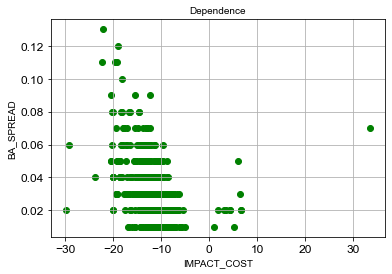

In [136]:
#Зависимость между BA_SPREAD и AV_PRICE_IMPACT
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,10))
fig, ax = plt.subplots()
plt.scatter(x['IMPACT_COST'],x['BA_SPREAD'],color ='green') 
ax.set_xlabel('IMPACT_COST', fontsize = 10)
ax.set_ylabel('BA_SPREAD', fontsize = 10)
ax.set_title('Dependence', fontsize = 10)
ax.grid()
plt.show()

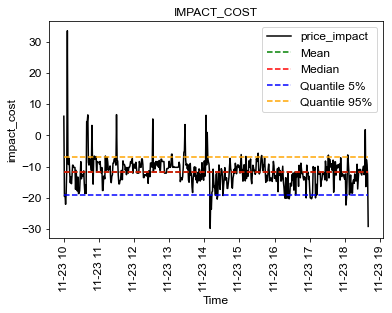

In [137]:
#График для Impact_cost
from datetime import datetime

x['TIME'] = pd.to_datetime(x['TIME'], format='%H%M%S%f')
x['TIME'] = pd.to_datetime(x['TIME'].dt.strftime('{} %H:%M:%S'.format('20151123')))
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.title('IMPACT_COST')  
plt.plot(x['TIME'], x['IMPACT_COST'], color='black', label='price_impact')
plt.plot(x['TIME'], [np.mean(x['IMPACT_COST']) for i in range(len(x['IMPACT_COST']))], label='Mean', color='green', linestyle='--')
plt.plot(x['TIME'], [np.median(x['IMPACT_COST']) for i in range(len(x['IMPACT_COST']))], label='Median', color='red', linestyle='--')
plt.plot(x['TIME'], [np.quantile((x['IMPACT_COST']), 0.05) for i in range(len(x['IMPACT_COST']))], label='Quantile 5%', color='blue', linestyle='dashed')
plt.plot(x['TIME'], [np.quantile((x['IMPACT_COST']), 0.95) for i in range(len(x['IMPACT_COST']))], label='Quantile 95%', color='orange', linestyle='dashed')
ax.set(xlabel='Time', ylabel='impact_cost')
plt.xticks(rotation=90)
plt.legend()
plt.show()

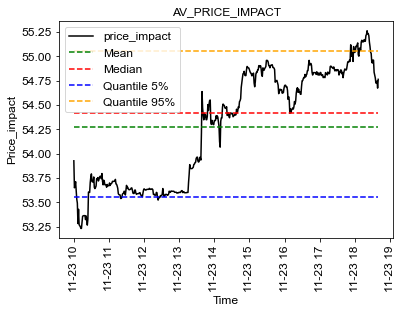

In [138]:
#Переведем колонку TIME в формат времени для построения графиков
from datetime import datetime

x['TIME'] = pd.to_datetime(x['TIME'], format='%H%M%S%f')
x['TIME'] = pd.to_datetime(x['TIME'].dt.strftime('{} %H:%M:%S'.format('20151123')))
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.title('AV_PRICE_IMPACT')  
plt.plot(x['TIME'], x['AV_PRICE_IMPACT'], color='black', label='price_impact')
plt.plot(x['TIME'], [np.mean(x['AV_PRICE_IMPACT']) for i in range(len(x['AV_PRICE_IMPACT']))], label='Mean', color='green', linestyle='--')
plt.plot(x['TIME'], [np.median(x['AV_PRICE_IMPACT']) for i in range(len(x['AV_PRICE_IMPACT']))], label='Median', color='red', linestyle='--')
plt.plot(x['TIME'], [np.quantile((x['AV_PRICE_IMPACT']), 0.05) for i in range(len(x['AV_PRICE_IMPACT']))], label='Quantile 5%', color='blue', linestyle='dashed')
plt.plot(x['TIME'], [np.quantile((x['AV_PRICE_IMPACT']), 0.95) for i in range(len(x['AV_PRICE_IMPACT']))], label='Quantile 95%', color='orange', linestyle='dashed')
ax.set(xlabel='Time', ylabel='Price_impact')
plt.xticks(rotation=90)
plt.legend()
plt.show()

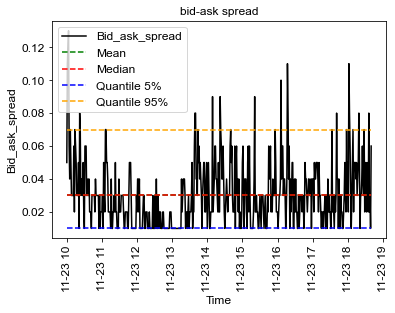

In [139]:
#Переведем колонку TIME в формат времени для построения графиков
from datetime import datetime

x['TIME'] = pd.to_datetime(x['TIME'], format='%H%M%S%f')
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.title('bid-ask spread')  
plt.plot(x['TIME'], x['BA_SPREAD'], color='black', label='Bid_ask_spread')
plt.plot(x['TIME'], [np.mean(x['BA_SPREAD']) for i in range(len(x['BA_SPREAD']))], label='Mean', color='green', linestyle='--')
plt.plot(x['TIME'], [np.median(x['BA_SPREAD']) for i in range(len(x['BA_SPREAD']))], label='Median', color='red', linestyle='--')
plt.plot(x['TIME'], [np.quantile((x['BA_SPREAD']), 0.05) for i in range(len(x['BA_SPREAD']))], label='Quantile 5%', color='blue', linestyle='dashed')
plt.plot(x['TIME'], [np.quantile((x['BA_SPREAD']), 0.95) for i in range(len(x['BA_SPREAD']))], label='Quantile 95%', color='orange', linestyle='dashed')
ax.set(xlabel='Time', ylabel='Bid_ask_spread')
plt.xticks(rotation=90)
plt.legend()
plt.show()

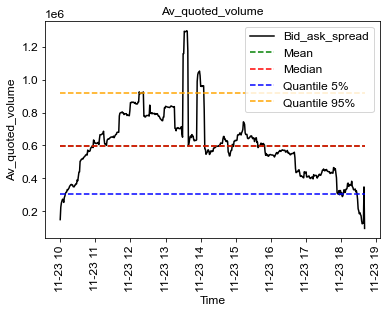

In [140]:
#Переведем колонку TIME в формат времени для построения графиков
from datetime import datetime

x['TIME'] = pd.to_datetime(x['TIME'], format='%H%M%S%f')
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.title('Av_quoted_volume')  
plt.plot(x['TIME'], x['Av_quoted_volume'], color='black', label='Bid_ask_spread')
plt.plot(x['TIME'], [np.mean(x['Av_quoted_volume']) for i in range(len(x['Av_quoted_volume']))], label='Mean', color='green', linestyle='--')
plt.plot(x['TIME'], [np.median(x['Av_quoted_volume']) for i in range(len(x['Av_quoted_volume']))], label='Median', color='red', linestyle='--')
plt.plot(x['TIME'], [np.quantile((x['Av_quoted_volume']), 0.05) for i in range(len(x['Av_quoted_volume']))], label='Quantile 5%', color='blue', linestyle='dashed')
plt.plot(x['TIME'], [np.quantile((x['Av_quoted_volume']), 0.95) for i in range(len(x['Av_quoted_volume']))], label='Quantile 95%', color='orange', linestyle='dashed')
ax.set(xlabel='Time', ylabel='Av_quoted_volume')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [358]:
import pandas as pd
with pd.ExcelWriter(r'C:\Users\User\Desktop\ALRS.xlsx') as writer:
    x.to_excel(writer)

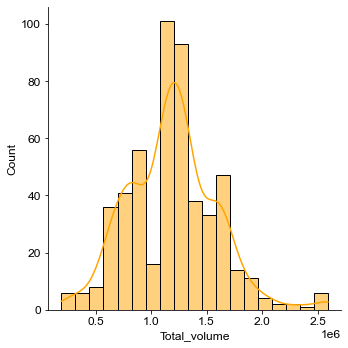

In [141]:
#Построение гистограммы и плотности распределения для общего объема за торговый день по ALRS
import seaborn as sns

sns_plot = sns.displot(data = x['Total_volume'],color = 'orange',kde = True)

In [142]:
#Поиск 90-% персентиля для объема. Этот объем будем использовать для расчета Inverse depth. 
#Поиск 90- персентиля 
trades = x['Total_volume']
per_trades_90 = np.percentile(trades, 90)
print('90%-percentile:', per_trades_90)

90%-percentile: 1669800.0


In [143]:
#Расчет лямбды Кайла
import numpy as np
#Расчет лямбды для стороны Bid
best_a_b = pd.DataFrame(x, columns = ['TIME','Best_bid','Best_ask','Total_volume'])
price_diff = best_a_b.Best_bid.diff()
#Лямбда Bid считается в базисных пунктах
lambda_bid = pd.DataFrame((abs(price_diff)/trades)*10000)
lambda_bid.columns=['Lambda_bid']
#Расчет лямбды для стороны Ask
price_diff_1 = best_a_b.Best_ask.diff()
#Лямбда ask считается в базисных пунктах,цена берется по модулю
lambda_ask = pd.DataFrame((abs(price_diff_1)/trades)*10000)
lambda_ask.columns=['Lambda_ask']
lambdas = pd.concat([lambda_bid,lambda_ask],axis = 1)
#Поиск среднего значения лямбды и переведем в базисные пункты
av_lambda = pd.DataFrame(lambdas.mean(axis=1))
av_lambda.columns=['Average_lambda']
#Поиск обратного показателя глубины - Inverse depth и перевод в базисные пункты
inv_lambda = pd.DataFrame(1/av_lambda)
inv_lambda.columns=['Inverse_lambda']
#Cоздание общего дейтафрейма
lamb = pd.concat([x[['TIME']],lambda_bid,lambda_ask,av_lambda,inv_lambda],axis = 1).replace(np.nan,0)
lamb

,TIME,Lambda_bid,Lambda_ask,Average_lambda,Inverse_lambda
0,2015-11-23 10:00:00,0.000000,0.000000,0.000000,0.000000
1,2015-11-23 10:01:00,0.006001,0.004668,0.005335,187.458333
2,2015-11-23 10:02:00,0.000400,0.000600,0.000500,2001.600000
3,2015-11-23 10:03:00,0.000950,0.001140,0.001045,957.090909
4,2015-11-23 10:04:00,0.000914,0.002195,0.001554,643.294118
...,...,...,...,...,...
516,2015-11-23 18:36:00,0.002017,0.000403,0.001210,826.333333
517,2015-11-23 18:37:00,0.000777,0.001554,0.001166,858.000000
518,2015-11-23 18:38:00,0.000781,0.001171,0.000976,1024.400000
519,2015-11-23 18:39:00,0.000718,0.001006,0.000862,1160.000000


In [144]:
x.describe()

,ASK_IMPACT,BID_IMPACT,MID_PRICE,BA_SPREAD,BEST_B_VOL,BEST_S_VOL,M_imbalance,Bid_quoted_volume,Ask_quoted_volume,Quoted_spread,Av_quoted_volume,Best_bid,Best_ask,Total_volume,AV_PRICE_IMPACT,IMPACT_COST
count,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,5.210000e+02,521.000000,5.210000e+02,521.000000,521.000000,5.210000e+02,521.000000,521.000000
mean,54.321712,54.236600,54.300441,0.030403,3933.397313,10683.301344,-0.125451,404217.850288,7.857123e+05,0.055934,5.949651e+05,54.285240,54.315643,1.189930e+06,54.279156,-11.745052
std,0.588257,0.580554,0.586730,0.019914,9607.266770,32835.257338,0.607883,110357.289362,3.527318e+05,0.036602,1.995997e+05,0.585225,0.588399,3.991995e+05,0.584218,4.662388
min,53.280000,53.179178,53.250000,0.010000,100.000000,100.000000,-0.997765,69800.000000,5.930000e+04,0.018088,9.600000e+04,53.220000,53.280000,1.920000e+05,53.233699,-29.832348
25%,53.672055,53.600000,53.660000,0.020000,700.000000,1000.000000,-0.694915,341400.000000,5.348000e+05,0.036304,4.397000e+05,53.650000,53.670000,8.794000e+05,53.635000,-14.092934
50%,54.473014,54.372329,54.440000,0.030000,1500.000000,2300.000000,-0.200000,410700.000000,7.290000e+05,0.054600,5.951000e+05,54.420000,54.470000,1.190200e+06,54.415959,-11.670131
75%,54.879726,54.783973,54.850000,0.040000,3200.000000,3900.000000,0.421053,446200.000000,9.710000e+05,0.073381,7.018500e+05,54.840000,54.870000,1.403700e+06,54.829384,-9.539783
max,55.294521,55.233836,55.285000,0.130000,93800.000000,268100.000000,0.997861,725600.000000,2.163200e+06,0.241928,1.296800e+06,55.280000,55.290000,2.593600e+06,55.263219,33.517515


In [72]:
y = calc('\'SBER\'', 100000000, 101000000, 1, 'm', conn)
y

ask_impact 106.88
bid_impact 106.88
ask_impact 106.29942465753425
bid_impact 106.23
ask_impact 106.30520547945206
bid_impact 106.22249315068493
ask_impact 106.1031506849315
bid_impact 106.01989041095891
ask_impact 106.28616438356164
bid_impact 106.18
ask_impact 106.23657534246576
bid_impact 106.17095890410958
ask_impact 106.16
bid_impact 106.05
ask_impact 106.2904109589041
bid_impact 106.2
ask_impact 106.39657534246575
bid_impact 106.29
ask_impact 106.47
bid_impact 106.37
ask_impact 106.44602739726028
bid_impact 106.34978082191782


,SECCODE,TIME,ASK_IMPACT,BID_IMPACT,MID_PRICE,BA_SPREAD,BEST_B_VOL,BEST_S_VOL,M_imbalance,Bid_quoted_volume,Ask_quoted_volume,Quoted_spread,Av_quoted_volume,Best_bid,Best_ask,Total_volume
0,'SBER',100000000,106.880000,106.880000,106.865,0.03,10.0,24480.0,-0.999183,1446630.0,2164490.0,0.028073,1805560.0,106.85,106.88,3611120.0
1,'SBER',100100000,106.299425,106.230000,106.280,0.02,50.0,450.0,-0.800000,1816890.0,2087810.0,0.018818,1952350.0,106.27,106.29,3904700.0
2,'SBER',100200000,106.305205,106.222493,106.265,0.01,5160.0,400.0,0.856115,1916880.0,1825700.0,0.009410,1871290.0,106.26,106.27,3742580.0
3,'SBER',100300000,106.103151,106.019890,106.070,0.04,750.0,1250.0,-0.250000,1832520.0,2017690.0,0.037711,1925105.0,106.05,106.09,3850210.0
4,'SBER',100400000,106.286164,106.180000,106.255,0.03,2540.0,700.0,0.567901,2345650.0,1751940.0,0.028234,2048795.0,106.24,106.27,4097590.0
5,'SBER',100500000,106.236575,106.170959,106.220,0.02,10.0,1250.0,-0.984127,2394110.0,1755110.0,0.018829,2074610.0,106.21,106.23,4149220.0
6,'SBER',100600000,106.160000,106.050000,106.125,0.07,1650.0,3950.0,-0.410714,2346260.0,1876980.0,0.065960,2111620.0,106.09,106.16,4223240.0
7,'SBER',100700000,106.290411,106.200000,106.270,0.04,10.0,3500.0,-0.994302,2588530.0,1755810.0,0.037640,2172170.0,106.25,106.29,4344340.0
8,'SBER',100800000,106.396575,106.290000,106.360,0.06,1250.0,1250.0,0.000000,2729150.0,1847460.0,0.056412,2288305.0,106.33,106.39,4576610.0
9,'SBER',100900000,106.470000,106.370000,106.440,0.06,3790.0,5050.0,-0.142534,2771560.0,1697460.0,0.056370,2234510.0,106.41,106.47,4469020.0


In [73]:
y.describe()

,TIME,ASK_IMPACT,BID_IMPACT,MID_PRICE,BA_SPREAD,BEST_B_VOL,BEST_S_VOL,M_imbalance,Bid_quoted_volume,Ask_quoted_volume,Quoted_spread,Av_quoted_volume,Best_bid,Best_ask,Total_volume
count,1.100000e+01,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,1.100000e+01,1.100000e+01,11.000000,1.100000e+01,11.000000,11.000000,1.100000e+01
mean,1.005000e+08,106.352139,106.269375,106.324545,0.038182,6375.454545,3975.454545,-0.200754,2.282225e+06,1.871424e+06,0.035913,2.076824e+06,106.305455,106.343636,4.153648e+06
std,3.316625e+05,0.207058,0.229452,0.210873,0.018878,16187.306980,6974.390817,0.732043,4.696978e+05,1.525188e+05,0.017769,1.776615e+05,0.211772,0.210394,3.553230e+05
min,1.000000e+08,106.103151,106.019890,106.070000,0.010000,10.000000,400.000000,-0.999183,1.446630e+06,1.697460e+06,0.009410,1.805560e+06,106.050000,106.090000,3.611120e+06
25%,1.002500e+08,106.261370,106.175479,106.237500,0.025000,30.000000,975.000000,-0.892063,1.874700e+06,1.755460e+06,0.023451,1.938728e+06,106.225000,106.250000,3.877455e+06
50%,1.005000e+08,106.299425,106.222493,106.270000,0.040000,1250.000000,1250.000000,-0.250000,2.346260e+06,1.825700e+06,0.037587,2.074610e+06,106.260000,106.290000,4.149220e+06
75%,1.007500e+08,106.421301,106.319890,106.390000,0.050000,3165.000000,3725.000000,0.283951,2.658840e+06,1.947335e+06,0.047040,2.203340e+06,106.365000,106.415000,4.406680e+06
max,1.010000e+08,106.880000,106.880000,106.865000,0.070000,54910.000000,24480.000000,0.948545,2.916290e+06,2.164490e+06,0.065960,2.360750e+06,106.850000,106.880000,4.721500e+06


In [74]:
#Расчет Impact cost: https://tavaga.com/tavagapedia/impact-cost/ в базисных пунктах и добавление колонки в дейтафрейм
import numpy as np
y['IMPACT_COST'] = (y['BID_IMPACT'] - y['MID_PRICE'])/(y['MID_PRICE'])*10000
y

,SECCODE,TIME,ASK_IMPACT,BID_IMPACT,MID_PRICE,BA_SPREAD,BEST_B_VOL,BEST_S_VOL,M_imbalance,Bid_quoted_volume,Ask_quoted_volume,Quoted_spread,Av_quoted_volume,Best_bid,Best_ask,Total_volume,IMPACT_COST
0,'SBER',100000000,106.880000,106.880000,106.865,0.03,10.0,24480.0,-0.999183,1446630.0,2164490.0,0.028073,1805560.0,106.85,106.88,3611120.0,1.403640
1,'SBER',100100000,106.299425,106.230000,106.280,0.02,50.0,450.0,-0.800000,1816890.0,2087810.0,0.018818,1952350.0,106.27,106.29,3904700.0,-4.704554
2,'SBER',100200000,106.305205,106.222493,106.265,0.01,5160.0,400.0,0.856115,1916880.0,1825700.0,0.009410,1871290.0,106.26,106.27,3742580.0,-4.000080
3,'SBER',100300000,106.103151,106.019890,106.070,0.04,750.0,1250.0,-0.250000,1832520.0,2017690.0,0.037711,1925105.0,106.05,106.09,3850210.0,-4.724200
4,'SBER',100400000,106.286164,106.180000,106.255,0.03,2540.0,700.0,0.567901,2345650.0,1751940.0,0.028234,2048795.0,106.24,106.27,4097590.0,-7.058491
5,'SBER',100500000,106.236575,106.170959,106.220,0.02,10.0,1250.0,-0.984127,2394110.0,1755110.0,0.018829,2074610.0,106.21,106.23,4149220.0,-4.616936
6,'SBER',100600000,106.160000,106.050000,106.125,0.07,1650.0,3950.0,-0.410714,2346260.0,1876980.0,0.065960,2111620.0,106.09,106.16,4223240.0,-7.067138
7,'SBER',100700000,106.290411,106.200000,106.270,0.04,10.0,3500.0,-0.994302,2588530.0,1755810.0,0.037640,2172170.0,106.25,106.29,4344340.0,-6.586995
8,'SBER',100800000,106.396575,106.290000,106.360,0.06,1250.0,1250.0,0.000000,2729150.0,1847460.0,0.056412,2288305.0,106.33,106.39,4576610.0,-6.581422
9,'SBER',100900000,106.470000,106.370000,106.440,0.06,3790.0,5050.0,-0.142534,2771560.0,1697460.0,0.056370,2234510.0,106.41,106.47,4469020.0,-6.576475


In [75]:
import pandas as pd
with pd.ExcelWriter(r'C:\Users\User\Desktop\SBER.xlsx') as writer:
    y.to_excel(writer)

In [145]:
#Дейтафрейм для Альросы для расчета PCA
import pandas as pd
Liq_met = pd.DataFrame(x,columns = ['TIME','BA_SPREAD','Av_quoted_volume','IMPACT_COST'])
Liq_met

,TIME,BA_SPREAD,Av_quoted_volume,IMPACT_COST
0,2015-11-23 10:00:00,0.05,149450.0,6.112850
1,2015-11-23 10:01:00,0.11,224950.0,-19.569472
2,2015-11-23 10:02:00,0.12,250200.0,-18.960660
3,2015-11-23 10:03:00,0.13,263200.0,-22.115124
4,2015-11-23 10:04:00,0.06,273400.0,-18.409529
...,...,...,...,...
516,2015-11-23 18:36:00,0.08,123950.0,-16.438356
517,2015-11-23 18:37:00,0.02,128700.0,-7.807769
518,2015-11-23 18:38:00,0.03,128050.0,-9.467601
519,2015-11-23 18:39:00,0.01,348000.0,-12.633139


In [146]:
import pandas as pd
with pd.ExcelWriter(r'C:\Users\User\Desktop\ALRS_liquidity_metrics.xlsx') as writer:
    Liq_met.to_excel(writer)

In [147]:
#Cтандартизация мер ликвидности для Альросы
from sklearn.preprocessing import StandardScaler
features = ['BA_SPREAD','IMPACT_COST','Av_quoted_volume']
# Отделение features
x1= Liq_met.loc[:, features].values
# Отделение времени
y1 = Liq_met.loc[:,['TIME']].values
# Standardizing 
x1 = StandardScaler().fit_transform(x1)
x1 = pd.DataFrame(x1,columns = ['BA_SPREAD','IMPACT_COST','Av_quoted_volume'])
x1

,BA_SPREAD,IMPACT_COST,Av_quoted_volume
0,0.985023,3.833887,-2.234187
1,4.000872,-1.679813,-1.855567
2,4.503514,-1.549108,-1.728942
3,5.006155,-2.226335,-1.663749
4,1.487665,-1.430787,-1.612598
...,...,...,...
516,2.492948,-1.007598,-2.362066
517,-0.522902,0.845290,-2.338245
518,-0.020260,0.488943,-2.341505
519,-1.025543,-0.190662,-1.238491


<Figure size 720x720 with 0 Axes>

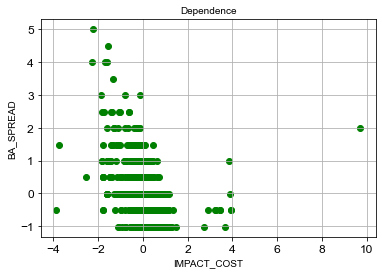

In [148]:
#Scatter plot для СТАНДАРТИЗИРОВАННЫХ мер ликвидности 
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,10))
fig, ax = plt.subplots()
plt.scatter(x1['IMPACT_COST'],x1['BA_SPREAD'],color ='green') 
ax.set_xlabel('IMPACT_COST', fontsize = 10)
ax.set_ylabel('BA_SPREAD', fontsize = 10)
ax.set_title('Dependence', fontsize = 10)
ax.grid()
plt.show()

In [149]:
C = np.corrcoef(x1['BA_SPREAD'],x1['IMPACT_COST'])
C

array([[ 1.        , -0.38879795],
       [-0.38879795,  1.        ]])

In [150]:
#Расчет PCA (3 столбца сворачиваются в два)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x1)
print("Variance of PCA1 is % s"
      %pca.explained_variance_ratio_)
print("Explained_variance is % s"
      %pca.explained_variance_)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1','principal component 2'])
principalDf

Variance of PCA1 is [0.53589646 0.27579368]
Explained_variance is [1.6107811  0.82897216]


,principal component 1,principal component 2
0,-0.362123,4.090500
1,4.485677,0.102712
2,4.670932,0.055670
3,5.341988,-0.457085
4,2.598636,0.236570
...,...,...
516,3.397403,1.017125
517,0.398323,2.370633
518,0.924511,2.114320
519,0.086779,0.898782


In [151]:
#Наложение оси времени
finalDf = pd.concat([principalDf, Liq_met[['TIME']]], axis = 1)
finalDf = finalDf.set_index('TIME')
finalDf

,principal component 1,principal component 2
TIME,,
2015-11-23 10:00:00,-0.362123,4.090500
2015-11-23 10:01:00,4.485677,0.102712
2015-11-23 10:02:00,4.670932,0.055670
2015-11-23 10:03:00,5.341988,-0.457085
2015-11-23 10:04:00,2.598636,0.236570
...,...,...
2015-11-23 18:36:00,3.397403,1.017125
2015-11-23 18:37:00,0.398323,2.370633
2015-11-23 18:38:00,0.924511,2.114320


<Figure size 360x360 with 0 Axes>

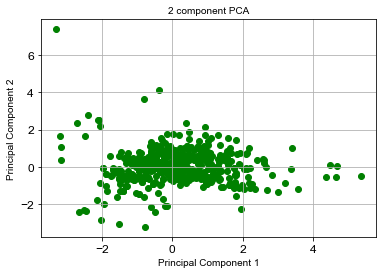

In [152]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (5,5))
fig, ax = plt.subplots()
plt.scatter(finalDf['principal component 1'],finalDf['principal component 2'],color ='green') 
ax.set_xlabel('Principal Component 1', fontsize = 10)
ax.set_ylabel('Principal Component 2', fontsize = 10)
ax.set_title('2 component PCA', fontsize = 10)
ax.grid()
plt.show()

In [153]:
#Расчет лямбды для стороны Bid для Сбера
best_a_b1 = pd.DataFrame(y, columns = ['TIME','Best_bid','Best_ask'])
price_diff1 = best_a_b1.Best_bid.diff()
#Поиск 90- персентиля и лямбды Bid
trades1 = y['Total_volume']
per_trades1_90 = np.percentile(trades1, 90)
print(per_trades1_90)
lambda_bid1= pd.DataFrame((abs(price_diff1)/trades1)*10000)
lambda_bid1.columns=['Lambda_bid']
#Расчет лямбды для стороны Ask
price_diff_1 = best_a_b1.Best_ask.diff()
lambda_ask1 = pd.DataFrame((abs(price_diff_1)/trades1)*10000)
lambda_ask1.columns=['Lambda_ask']
lambdas1 = pd.concat([lambda_bid1,lambda_ask1],axis = 1)
#Поиск среднего значения лямбды и переведем в базисные пункты
av_lambda1 = pd.DataFrame(lambdas1.mean(axis=1))
av_lambda1.columns=['Average_lambda']
#Поиск обратного показателя глубины - Inverse depth и перевод в базисные пункты
inv_lambda1 = pd.DataFrame((1/av_lambda1))
inv_lambda1.columns=['Inverse_lambda']
#Cоздание общего дейтафрейма
lamb1 = pd.concat([y[['TIME']],lambda_bid1,lambda_ask1,av_lambda1,inv_lambda1],axis = 1).replace(np.nan,0)
lamb1 

4576610.0


,TIME,Lambda_bid,Lambda_ask,Average_lambda,Inverse_lambda
0,100000000,0.000000,0.000000,0.000000,0.000000
1,100100000,0.001485,0.001511,0.001498,667.470085
2,100200000,0.000027,0.000053,0.000040,24950.533333
3,100300000,0.000545,0.000468,0.000506,1974.466667
4,100400000,0.000464,0.000439,0.000451,2214.913514
5,100500000,0.000072,0.000096,0.000084,11854.914286
6,100600000,0.000284,0.000166,0.000225,4445.515789
7,100700000,0.000368,0.000299,0.000334,2996.096552
8,100800000,0.000175,0.000219,0.000197,5085.122222
9,100900000,0.000179,0.000179,0.000179,5586.275000


In [154]:
#Дейтафрейм для Сбербанка для расчета PCA
import pandas as pd
Liq_met1 = pd.DataFrame(y,columns = ['TIME','BA_SPREAD','Av_quoted_volume','IMPACT_COST'])
Liq_met1

,TIME,BA_SPREAD,Av_quoted_volume,IMPACT_COST
0,100000000,0.03,1805560.0,1.403640
1,100100000,0.02,1952350.0,-4.704554
2,100200000,0.01,1871290.0,-4.000080
3,100300000,0.04,1925105.0,-4.724200
4,100400000,0.03,2048795.0,-7.058491
5,100500000,0.02,2074610.0,-4.616936
6,100600000,0.07,2111620.0,-7.067138
7,100700000,0.04,2172170.0,-6.586995
8,100800000,0.06,2288305.0,-6.581422
9,100900000,0.06,2234510.0,-6.576475


In [113]:
import pandas as pd
with pd.ExcelWriter(r'C:\Users\User\Desktop\SBER_liquidity_metrics.xlsx') as writer:
    Liq_met1.to_excel(writer)

In [155]:
#Cтандартизация мер ликвидности для Сбера
from sklearn.preprocessing import StandardScaler
features1 = ['BA_SPREAD','Av_quoted_volume','IMPACT_COST']
# Отделение features
x2= Liq_met1.loc[:, features1].values
# Отделение времени
y2 = Liq_met1.loc[:,['TIME']].values
# Standardizing 
x2 = StandardScaler().fit_transform(x2)
x2 = pd.DataFrame(x2,columns = ['BA_SPREAD','Av_quoted_volume','IMPACT_COST'])
x2

,BA_SPREAD,Av_quoted_volume,IMPACT_COST
0,-0.454569,-1.601384,2.812787
1,-1.010153,-0.734822,0.207840
2,-1.565736,-1.213352,0.508275
3,0.101015,-0.895660,0.199461
4,-0.454569,-0.165467,-0.796039
5,-1.010153,-0.013071,0.245206
6,1.767767,0.205415,-0.799726
7,0.101015,0.562866,-0.594961
8,1.212183,1.248459,-0.592584
9,1.212183,0.930885,-0.590474


In [156]:
#PCA для Сбера
#Расчет PCA (3 столбца сворачиваются в один)
from sklearn.decomposition import PCA
pca1 = PCA(n_components=2)
principalComponents2 = pca1.fit_transform(x2)
print("Variance of PCA2 is % s"
      %pca1.explained_variance_ratio_)
print("Explained_variance is % s"
      %pca1.explained_variance_)
principalDf1 = pd.DataFrame(data = principalComponents2, columns = ['principal component 1','principal component 2'])
principalDf1

Variance of PCA2 is [0.73635374 0.18418599]
Explained_variance is [2.42996735 0.60781376]


,principal component 1,principal component 2
0,2.864245,1.471886
1,1.110052,-0.576507
2,1.874657,-0.777314
3,0.615535,0.351284
4,-0.119347,-0.781441
5,0.685982,-0.683629
6,-1.528539,0.958729
7,-0.746862,-0.347071
8,-1.757917,0.436777
9,-1.560546,0.494187


In [157]:
#Наложение оси времени
finalDf1 = pd.concat([principalDf1, Liq_met1[['TIME']]], axis = 1)
finalDf1= finalDf1.set_index('TIME')
finalDf1

,principal component 1,principal component 2
TIME,,
100000000,2.864245,1.471886
100100000,1.110052,-0.576507
100200000,1.874657,-0.777314
100300000,0.615535,0.351284
100400000,-0.119347,-0.781441
100500000,0.685982,-0.683629
100600000,-1.528539,0.958729
100700000,-0.746862,-0.347071
100800000,-1.757917,0.436777


In [158]:
#import pandas as pd
#with pd.ExcelWriter(r'C:\Users\User\Desktop\data1.xlsx') as writer:
    #final_PCA.to_excel(writer)

<Figure size 360x360 with 0 Axes>

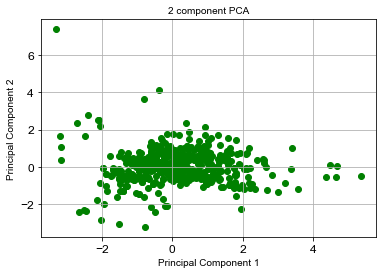

In [160]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (5,5))
fig, ax = plt.subplots()
plt.scatter(finalDf['principal component 1'],finalDf['principal component 2'],color ='green') 
ax.set_xlabel('Principal Component 1', fontsize = 10)
ax.set_ylabel('Principal Component 2', fontsize = 10)
ax.set_title('2 component PCA', fontsize = 10)
ax.grid()
plt.show()

In [161]:
#Commonality (матрица корреляций)
import numpy as np
C = np.corrcoef(finalDf1['principal component 1'],finalDf1['principal component 2'])
corr = pd.DataFrame(C)
corr

,0,1
0,1.000000e+00,1.257006e-16
1,1.257006e-16,1.000000e+00


In [162]:
#Разница между значениями PCA (velocity)
#Убрать NaN значения
delta_PCA = finalDf.diff()
delta_PCA.fillna(0, inplace=True)
delta_PCA.head(100)

,principal component 1,principal component 2
TIME,,
2015-11-23 10:00:00,0.000000,0.000000
2015-11-23 10:01:00,4.847800,-3.987788
2015-11-23 10:02:00,0.185255,-0.047042
2015-11-23 10:03:00,0.671056,-0.512755
2015-11-23 10:04:00,-2.743352,0.693655
...,...,...
2015-11-23 11:35:00,-0.013631,-0.020268
2015-11-23 11:36:00,-0.135791,0.144608
2015-11-23 11:37:00,-0.372128,0.006128


In [163]:
import pandas as pd
with pd.ExcelWriter(r'C:\Users\User\Desktop\delta_PCA.xlsx') as writer:
    delta_PCA.to_excel(writer)

In [164]:
#Поиск 95% и 5% персентиля для 1-ой бумаги
import numpy as np
t_95 = np.percentile(delta_PCA['principal component 1'],95)
t_5 = np.percentile(delta_PCA['principal component 1'],5)
print('Percentile_95:',t_95,'Percentile_5:',t_5)


Percentile_95: 1.6113974889177982 Percentile_5: -1.7154645142450817


In [165]:
#Поиск 95% и 5% персентиля для 2-ой бумаги
t1_95 = np.percentile(delta_PCA['principal component 2'],95)
t1_5 = np.percentile(delta_PCA['principal component 2'],5)
print('Percentile_95:',t1_95,'Percentile_5:',t1_5)

Percentile_95: 1.041686397173433 Percentile_5: -0.996738911391849


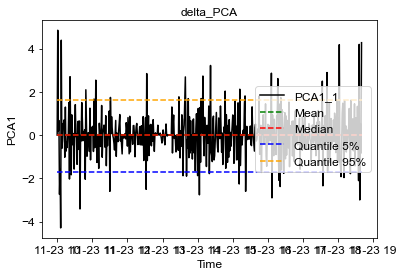

In [166]:
#Визуализация delta_PCA для 1 бумаги - Альроса
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.title('delta_PCA')
plt.plot(delta_PCA.index, delta_PCA['principal component 1'], color='black', label='PCA1_1')
plt.plot(delta_PCA.index, [np.mean(delta_PCA['principal component 1']) for i in range(len(delta_PCA['principal component 1']))], label='Mean', color='green', linestyle='--')
plt.plot(delta_PCA.index, [np.median(delta_PCA['principal component 1']) for i in range(len(delta_PCA['principal component 1']))], label='Median', color='red', linestyle='--')
plt.plot(delta_PCA.index, [np.quantile(delta_PCA['principal component 1'], 0.05) for i in range(len(delta_PCA['principal component 1']))], label='Quantile 5%', color='blue', linestyle='dashed')
plt.plot(delta_PCA.index, [np.quantile(delta_PCA['principal component 1'], 0.95) for i in range(len(delta_PCA['principal component 1']))], label='Quantile 95%', color='orange', linestyle='dashed')
ax.set(xlabel='Time', ylabel='PCA1')
plt.legend(loc = 'right')
plt.show()

In [167]:
#Отобрать значения дельта PCA, где дельта PCA превышает 95% персентиль
T = delta_PCA.loc[delta_PCA['principal component 1']>=t_95]
T1 = T[['principal component 1']].reset_index('TIME')
T1

,TIME,principal component 1
0,2015-11-23 10:01:00,4.847800
1,2015-11-23 10:07:00,4.386592
2,2015-11-23 10:22:00,2.699713
3,2015-11-23 10:49:00,2.094575
4,2015-11-23 11:03:00,1.665115
5,2015-11-23 11:06:00,2.539628
6,2015-11-23 11:31:00,1.740546
7,2015-11-23 12:33:00,2.843057
8,2015-11-23 13:28:00,1.767453
9,2015-11-23 13:39:00,2.689153


In [584]:
import pandas as pd
with pd.ExcelWriter(r'C:\Users\User\Desktop\exstreme.xlsx') as writer:
    T1.to_excel(writer)

In [168]:
#Нахождение разницы во времени между моментом события и 100000000
from datetime import timedelta
t= T1['TIME']
time_delta = pd.to_datetime(t, format='%H%M%S%f')- pd.to_datetime(100000000,format = '%H%M%S%f')
event_times = time_delta-timedelta(days=42329)
event_times

0    0 days 00:01:00
1    0 days 00:07:00
2    0 days 00:22:00
3    0 days 00:49:00
4    0 days 01:03:00
5    0 days 01:06:00
6    0 days 01:31:00
7    0 days 02:33:00
8    0 days 03:28:00
9    0 days 03:39:00
10   0 days 03:44:00
11   0 days 04:06:00
12   0 days 04:09:00
13   0 days 04:22:00
14   0 days 04:47:00
15   0 days 05:12:00
16   0 days 05:21:00
17   0 days 05:45:00
18   0 days 06:06:00
19   0 days 06:17:00
20   0 days 06:22:00
21   0 days 07:33:00
22   0 days 07:41:00
23   0 days 08:02:00
24   0 days 08:22:00
25   0 days 08:36:00
26   0 days 08:40:00
Name: TIME, dtype: timedelta64[ns]

In [169]:
#Перевести время с момента 100000000 в минуты
times = []
for t in event_times:
    times.append(t.seconds//60)
print(times)
#Нужно преобразование чисел в списке в формат float для расчета параметров процесса Хоукса
new_list = []
for item in times:
    new_list.append(float(item))
new_list

[1, 7, 22, 49, 63, 66, 91, 153, 208, 219, 224, 246, 249, 262, 287, 312, 321, 345, 366, 377, 382, 453, 461, 482, 502, 516, 520]


[1.0,
 7.0,
 22.0,
 49.0,
 63.0,
 66.0,
 91.0,
 153.0,
 208.0,
 219.0,
 224.0,
 246.0,
 249.0,
 262.0,
 287.0,
 312.0,
 321.0,
 345.0,
 366.0,
 377.0,
 382.0,
 453.0,
 461.0,
 482.0,
 502.0,
 516.0,
 520.0]

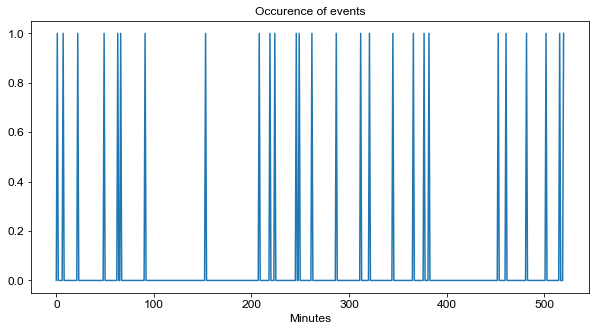

In [186]:
# Время возникновения событий
import numpy as np
import matplotlib.pyplot as plt

bc = np.bincount(np.floor(times).astype(int))

plt.figure(figsize=(10,5))
plt.title("Occurence of events")
plt.xlabel("Minutes")
plt.plot(bc[:530])

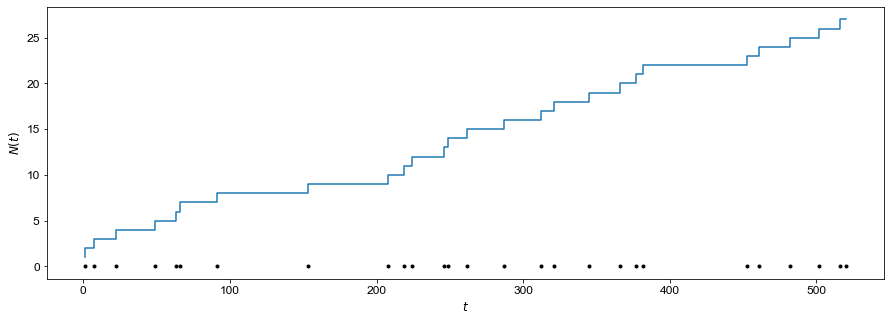

In [187]:
#Counting process N(t)/Процесс счета
ar_pp = sorted(times)
f = plt.figure(figsize=(15,5))

plt.step(ar_pp, np.cumsum(np.ones_like(ar_pp)))
plt.ylabel("$N(t)$")
plt.xlabel('$t$')
_ = plt.plot(ar_pp, np.zeros_like(ar_pp), 'k.')

In [188]:
import Hawkes as hk
import numpy as np
itv = [0,520] # the observation interval
T = np.array(new_list) # sample data
model = hk.estimator().set_kernel('exp',num_exp=2).set_baseline('const').set_data({'T':T}, itv)
model.fit(T,itv) # T is the event times (numpy.ndarray)
print("parameter:",model.parameter) # the estimated parameter values
print("branching ratio:",model.br) # the branching ratio
print("log-likelihood:",model.L) # the log-likelihood of the estimated parameter values
print("AIC:",model.AIC) # the AIC of the estimated parameter values

parameter: {'mu': 0.050000009868096336, 'alpha': array([2.72503913e-04, 2.74091778e-07]), 'beta': array([1.99567563e-07, 2.79236974e+08])}
branching ratio: 0.0002727780047947203
log-likelihood: -103.88904625815091
AIC: 213.77809251630183


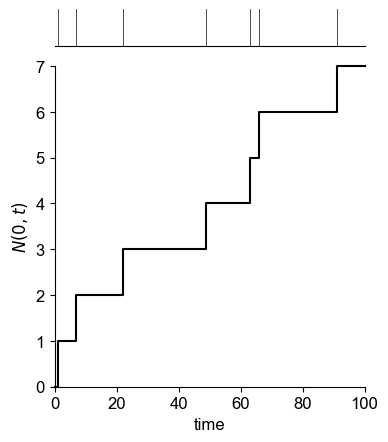

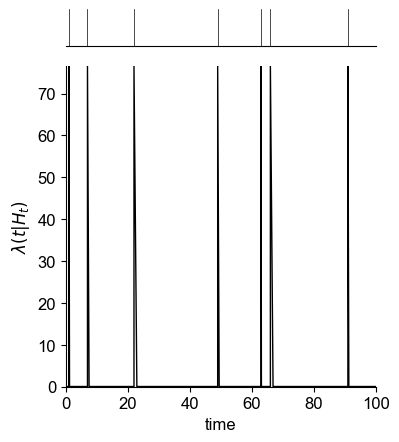

In [189]:
#Здесь задана интенсивность в обычном виде с двойной экспоненциальной функцией 𝜆(𝑡|𝐻𝑡)=𝜇(𝑡)+∑𝑡𝑖<𝑡𝑓(𝑡−𝑡𝑖)
import numpy as np
import Hawkes as hk

para = {"mu":0.05, "alpha":[2.72503913e-04, 2.74091778e-07], "beta":[1.99567563e-07, 2.79236974e+08]}
itv = [0,100]
T = np.array(times)
model = hk.estimator().set_kernel('exp',num_exp=2).set_baseline('const').set_parameter(para).set_data({'T':T}, itv)
model.plot_N() # the figure of N(0,T)
model.plot_l() # the figure of time vs conditional intensity function

In [190]:
[T_trans, itv_trans] = model.t_trans()
time = model.t_trans()
time

[array([0.05      , 0.35000027, 1.10000055, 2.45000083, 3.15000111,
        3.30000138, 4.55000166]),
 [0, 5.000001940449844]]

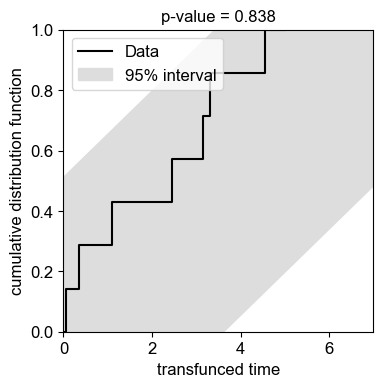

In [191]:
#График для теста Колмогорова-Смирнова
model.plot_KS()